In [181]:
import numpy as np

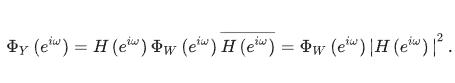

In [182]:
def H(q, b_1, b_2):
    return 1 + b_1 * q**(-1) + b_2 * q**(-2)

def Phi_Y(omega, b_1, b_2, sigma2):
    return sigma2 * np.abs(H(np.exp(1j*omega), b_1, b_2))**2

b_1 = 1
b_2 = 1
sigma2 = 1
omega = 0

Phi_Y(omega, b_1, b_2, sigma2)

9.0

In [183]:
X = np.array([1, 2, 3, 4])[:, np.newaxis]
Y = np.array([1, 2, 3, 3])[:, np.newaxis]

1/30 * 26

0.8666666666666667

In [184]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[0.86666667]])

________________

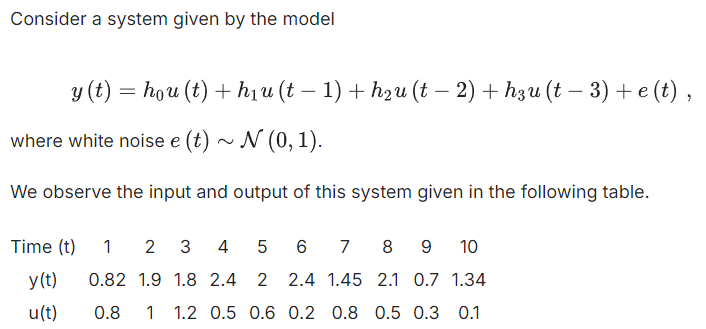

In [185]:
import pandas as pd
from matplotlib import pyplot as plt

y = np.append(np.zeros(3), np.array([0.82, 1.9, 1.8, 2.4, 2, 2.4, 1.45, 2.1, 0.7, 1.34]))
u = np.append(np.zeros(3), np.array([0.8, 1, 1.2, 0.5, 0.6, 0.2, 0.8, 0.5, 0.3, 0.1]))

df = pd.DataFrame(np.array([u, y]).T, index=np.arange(-2, 11))
df.columns = ["u", "y"]
df

,u,y
-2,0.0,0.00
-1,0.0,0.00
0,0.0,0.00
1,0.8,0.82
2,1.0,1.90
3,1.2,1.80
4,0.5,2.40
5,0.6,2.00
6,0.2,2.40
7,0.8,1.45


In [186]:
X = [(df.loc[i:i+3].u).reset_index(drop=True) for i in range(-2, 8)]
Y = df[df.index > 0].y.to_numpy()

X = pd.DataFrame(X, index=range(1, 11)).to_numpy()

# print(type(X))
# print("length =", len(X))
print("X:\n", X)
print("_"*40)
print("Y:\n", Y)

X:
 [[0.  0.  0.  0.8]
 [0.  0.  0.8 1. ]
 [0.  0.8 1.  1.2]
 [0.8 1.  1.2 0.5]
 [1.  1.2 0.5 0.6]
 [1.2 0.5 0.6 0.2]
 [0.5 0.6 0.2 0.8]
 [0.6 0.2 0.8 0.5]
 [0.2 0.8 0.5 0.3]
 [0.8 0.5 0.3 0.1]]
________________________________________
Y:
 [0.82 1.9  1.8  2.4  2.   2.4  1.45 2.1  0.7  1.34]


In [187]:
def calc_LSE(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

def calc_covar_LSE(X, sigma2=1):
    return sigma2 * np.linalg.inv(X.T @ X)

def calc_std_LSE(X, sigma2=1):
    return np.sqrt(np.diag(calc_covar_LSE(X, sigma2)))

def calc_bi(X, Y, q, sigma2=1):
    theta_hat = calc_LSE(X, Y)
    theta_hat_std_diag = calc_std_LSE(X, sigma2)
    # TODO


In [188]:
h_hat = calc_LSE(X, Y)

h_hat

array([ 1.52767364, -0.56121689,  1.02461902,  1.03553061])

In [189]:
h_mean = h_hat
h_var = calc_covar_LSE(X)
h_var

array([[ 0.70601608, -0.49867786, -0.23915617,  0.21219259],
       [-0.49867786,  0.95872738, -0.26282607, -0.21070239],
       [-0.23915617, -0.26282607,  0.97153791, -0.49314313],
       [ 0.21219259, -0.21070239, -0.49314313,  0.6518157 ]])

In [190]:
h_std_diag = calc_std_LSE(X)
h_std_diag

array([0.84024763, 0.97914625, 0.98566622, 0.80735104])

In [191]:
import sympy as sp

a = sp.Symbol("a")
b = sp.Symbol("b")
c = sp.Symbol("c")


a_hat = a - (c * (1-a**2) / (1 + c**2 - 2*a*c))
b_hat = b - b*c*((1-a) / (1 + c**2 - 2*a*c))

sp.simplify(a_hat + b_hat)

(b*c*(a - 1) + c*(a**2 - 1) + (a + b)*(-2*a*c + c**2 + 1))/(-2*a*c + c**2 + 1)

In [192]:
alphas = np.array([3/2, -3/4, 1/8])
alphas

array([ 1.5  , -0.75 ,  0.125])

In [193]:
def calc_eq_right(tau, alphas, sigma2=1):
    p = len(alphas)
    R_arr = [sp.Symbol(f"R_{i}") for i in range(p+1)]

    eq_right = 0
    for i in range(1, p+1):
        eq_right += R_arr[abs(tau - i)] * alphas[i-1]
    
    if tau == 0:
        eq_right += sigma2

    return eq_right

alphas = np.array([3/2, -3/4, 1/8])
calc_eq_right(0, alphas)

1.5*R_1 - 0.75*R_2 + 0.125*R_3 + 1

In [194]:
def calc_equations(alphas, sigma2=1):
    p = len(alphas)
    equations = []

    for tau in range(p+1):
        eq = sp.Eq(sp.Symbol(f"R_{tau}"), calc_eq_right(tau, alphas, sigma2))
        equations.append(eq)
    
    return equations

equations = calc_equations(alphas)
equations

[Eq(R_0, 1.5*R_1 - 0.75*R_2 + 0.125*R_3 + 1),
 Eq(R_1, 1.5*R_0 - 0.75*R_1 + 0.125*R_2),
 Eq(R_2, -0.75*R_0 + 1.625*R_1),
 Eq(R_3, 0.125*R_0 - 0.75*R_1 + 1.5*R_2)]

In [195]:
alphas = np.array([3/2, -3/4, 1/8])
p = len(alphas)
# Generate R symbols
R_arr = [sp.Symbol(f"R_{i}") for i in range(p+1)]

# Solve the system of equations
solution = sp.solve(equations, R_arr)

# Print the solution
solution

{R_0: 8.69135802469136,
 R_1: 7.90123456790124,
 R_2: 6.32098765432099,
 R_3: 4.64197530864198}

In [196]:
def solve_ARp_yulewalker(alphas, sigma2=1):
    # Solves the values of autocorrelation function
    # in an AR(p) process with Yule-Walker equations
    equations = calc_equations(alphas)
    p = len(alphas)

    # Generate R symbols
    R_arr = [sp.Symbol(f"R_{i}") for i in range(p+1)]

    # Solve the system of equations
    solution = sp.solve(equations, R_arr)

    return solution

In [197]:
solve_ARp_yulewalker(alphas)

{R_0: 8.69135802469136,
 R_1: 7.90123456790124,
 R_2: 6.32098765432099,
 R_3: 4.64197530864198}

In [198]:
H = sp.Symbol("H_q")
q = sp.symbols("q", complex=True)

H = 1 - (3/2 * q**(-1) - 3/4 * q**(-2) + 1/8 * q**(-3))
H

1 - 1.5/q + 0.75/q**2 - 0.125/q**3

In [199]:
roots = sp.solve(H)
roots

[0.500000000000000]

In [200]:
from sympy import symbols

# Create a complex symbol 'z'
q = symbols('q')
a = symbols("a")
z = q**(-1)

A_q = (1 - z + a*z**2)

r_1, r_2 = sp.solve(A_q, z)
r_2

(sqrt(1 - 4*a) + 1)/(2*a)

In [204]:
C_1, C_2 = symbols("C_1 C_2")

B_q = (1 - 4*z)

eq1 = C_1 + C_2 - 1
eq2 = C_1*r_2 + C_2*r_1 - 4

result = sp.solve([eq1, eq2], (C_1, C_2))
result

{C_1: 4*a/sqrt(1 - 4*a) + 1/2 - 1/(2*sqrt(1 - 4*a)),
 C_2: -4*a/sqrt(1 - 4*a) + 1/2 + 1/(2*sqrt(1 - 4*a))}